1. Time Constant Calculation:


<IPython.core.display.Math object>


2. Square Wave Response:


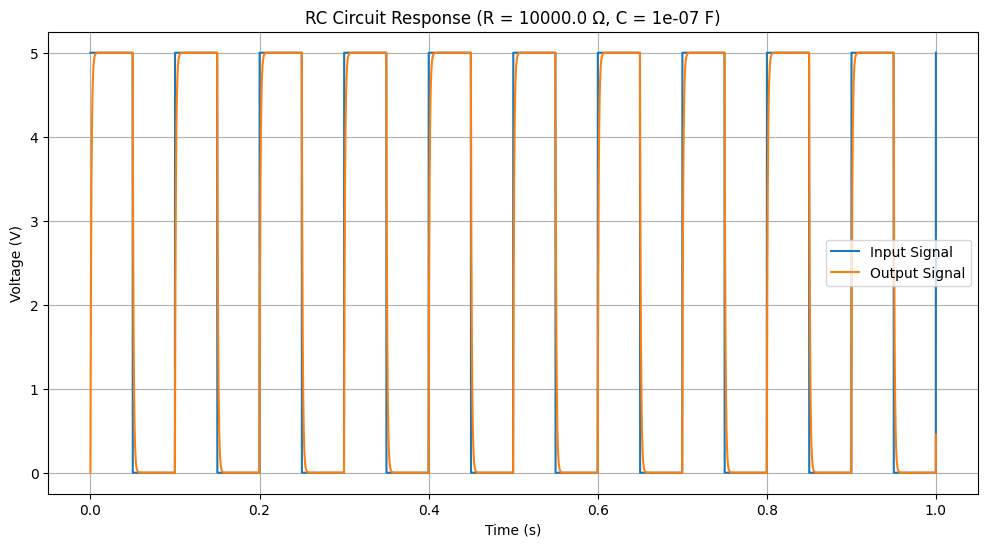

<IPython.core.display.Math object>

<IPython.core.display.Math object>

   Time (s)  Input Voltage (V)  Output Voltage (V)
0    0.0000                5.0            0.000000
1    0.0001                5.0            0.454587
2    0.0002                5.0            0.867844
3    0.0003                5.0            1.243528
4    0.0004                5.0            1.585057

3. Bode Plot Analysis:


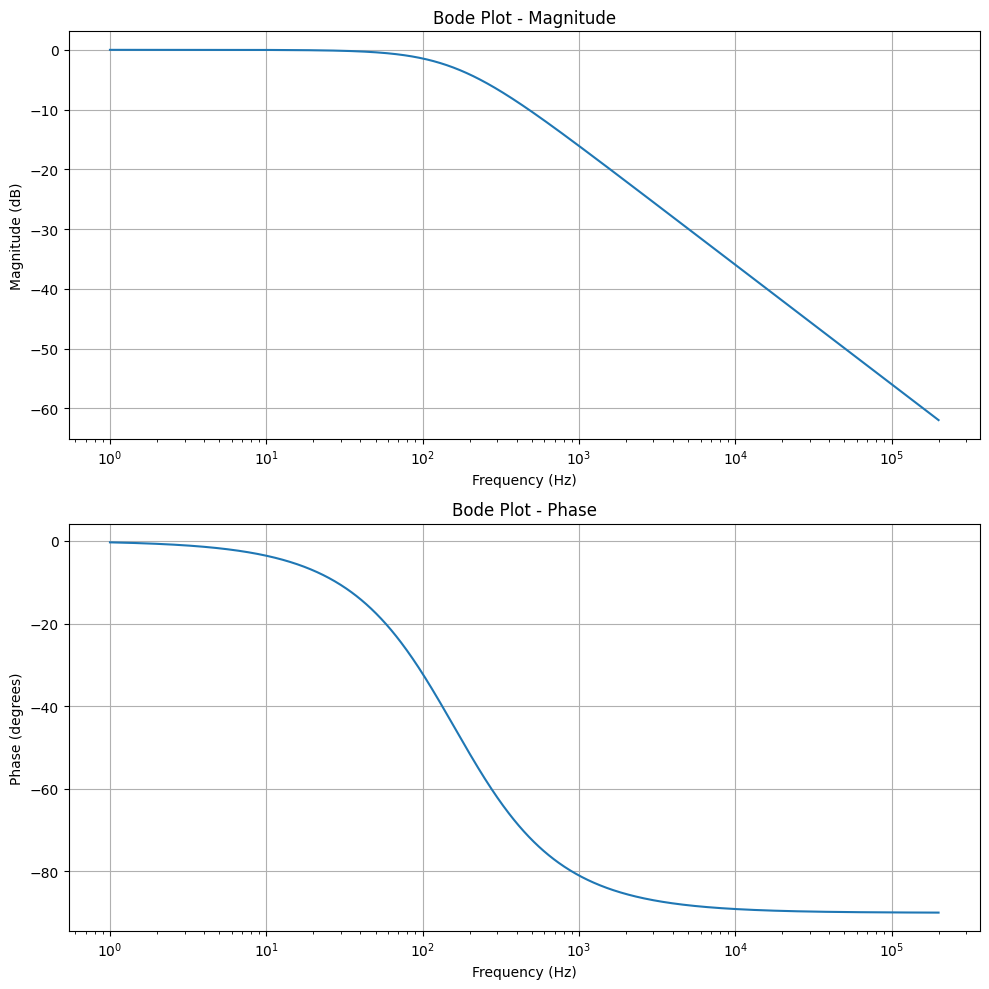

<IPython.core.display.Math object>

   Frequency (Hz)  Magnitude (dB)  Phase (degrees)
0        1.000000       -0.000171        -0.359995
1        1.012293       -0.000176        -0.364421
2        1.024738       -0.000180        -0.368900
3        1.037335       -0.000184        -0.373435
4        1.050087       -0.000189        -0.378026

4. Impulse Response:


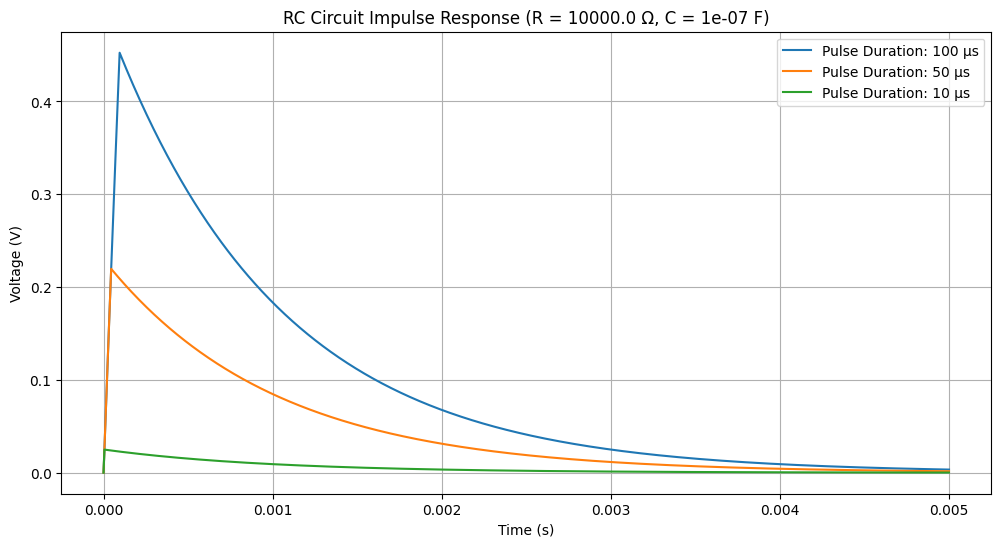

   Time (s)  Output (Pulse 100 µs)  Time (s)  Output (Pulse 50 µs)  Time (s)  \
0  0.000000               0.000000  0.000000              0.000000  0.000000   
1  0.000005               0.024900  0.000005              0.024900  0.000005   
2  0.000010               0.049677  0.000010              0.049677  0.000010   
3  0.000015               0.074330  0.000015              0.074330  0.000015   
4  0.000020               0.098860  0.000020              0.098860  0.000020   

   Output (Pulse 10 µs)  
0              0.000000  
1              0.024900  
2              0.024776  
3              0.024653  
4              0.024530  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from IPython.display import Math, display

class RCCircuitAnalysis:
    def __init__(self, R, C):
        """
        Initialize RC circuit parameters
        
        Parameters:
        - R: Resistance in ohms
        - C: Capacitance in farads
        """
        self.R = R
        self.C = C
        self.tau = R * C
    
    def display_time_constant(self):
        """Display time constant calculation in LaTeX"""
        display(Math(r'\tau = R \cdot C = %.2e \, \mathrm{s}' % self.tau))
        return self.tau
    
    def square_wave_response(self, frequency=10, amplitude=5, offset=2.5, duration=1):
        """
        Simulate RC circuit response to square wave
        
        Returns: 
        - DataFrame with time, input, and output signals
        - Plots response
        """
        t = np.linspace(0, duration, 10000)
        
        # Generate square wave input
        input_signal = signal.square(2 * np.pi * frequency * t, duty=0.5) * amplitude/2 + offset
        
        # RC circuit differential equation solution
        output_signal = np.zeros_like(t)
        output_signal[0] = 0
        dt = t[1] - t[0]
        
        for i in range(1, len(t)):
            dV = (input_signal[i] - output_signal[i-1]) * (dt / (self.tau + dt))
            output_signal[i] = output_signal[i-1] + dV
        
        # Create DataFrame
        df = pd.DataFrame({
            'Time (s)': t, 
            'Input Voltage (V)': input_signal, 
            'Output Voltage (V)': output_signal
        })
        
        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(t, input_signal, label='Input Signal')
        plt.plot(t, output_signal, label='Output Signal')
        plt.title(f'RC Circuit Response (R = {self.R} Ω, C = {self.C} F)')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Display key statistics in LaTeX
        display(Math(r'\text{Max Input Voltage}: %.2f \, \mathrm{V}' % np.max(input_signal)))
        display(Math(r'\text{Max Output Voltage}: %.2f \, \mathrm{V}' % np.max(output_signal)))
        
        return df
    
    def bode_plot(self, min_freq=1, max_freq=200000):
        """
        Generate Bode plot with detailed analysis
        
        Returns:
        - DataFrame with frequency, magnitude, phase
        - Bode plot
        """
        frequencies = np.logspace(np.log10(min_freq), np.log10(max_freq), 1000)
        omega = 2 * np.pi * frequencies
        
        # Transfer function
        H = 1 / (1 + 1j * omega * self.R * self.C)
        
        # Magnitude in dB
        magnitude_db = 20 * np.log10(np.abs(H))
        
        # Phase in degrees
        phase_deg = np.angle(H, deg=True)
        
        # Create DataFrame
        df = pd.DataFrame({
            'Frequency (Hz)': frequencies, 
            'Magnitude (dB)': magnitude_db, 
            'Phase (degrees)': phase_deg
        })
        
        # Plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
        
        # Magnitude plot
        ax1.semilogx(frequencies, magnitude_db)
        ax1.set_title('Bode Plot - Magnitude')
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('Magnitude (dB)')
        ax1.grid(True)
        
        # Phase plot
        ax2.semilogx(frequencies, phase_deg)
        ax2.set_title('Bode Plot - Phase')
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('Phase (degrees)')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Calculate and display key characteristics in LaTeX
        cutoff_freq = 1 / (2 * np.pi * self.R * self.C)
        display(Math(r'\text{Cutoff Frequency}: f_c = \frac{1}{2\pi RC} = %.2e \, \mathrm{Hz}' % cutoff_freq))
        
        return df
    
    def impulse_response(self, pulse_durations=[100e-6, 50e-6, 10e-6]):
        """
        Simulate RC circuit impulse response
        
        Returns:
        - DataFrame with time and voltage for each pulse duration
        - Impulse response plot
        """
        results_list = []
        
        plt.figure(figsize=(12, 6))
        for duration in pulse_durations:
            t = np.linspace(0, 5*self.tau, 1000)
            
            # Create impulse input
            input_signal = np.zeros_like(t)
            input_signal[t <= duration] = 5  # 5V during pulse duration
            
            # RC circuit differential equation solution
            output_signal = np.zeros_like(t)
            output_signal[0] = 0
            dt = t[1] - t[0]
            
            for i in range(1, len(t)):
                dV = (input_signal[i] - output_signal[i-1]) * (dt / (self.tau + dt))
                output_signal[i] = output_signal[i-1] + dV
            
            plt.plot(t, output_signal, label=f'Pulse Duration: {duration*1e6:.0f} µs')
            
            # Store results for each duration
            results_list.append(pd.DataFrame({
                'Time (s)': t, 
                f'Output (Pulse {duration*1e6:.0f} µs)': output_signal
            }))
        
        plt.title(f'RC Circuit Impulse Response (R = {self.R} Ω, C = {self.C} F)')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Combine results into single DataFrame
        results_df = pd.concat(results_list, axis=1)
        
        return results_df

def main():
    # Parameters from the lab document
    R = 10e3  # 10 kΩ
    C = 100e-9  # 100 nF
    
    # Create RC circuit analysis object
    rc_analysis = RCCircuitAnalysis(R, C)
    
    print("1. Time Constant Calculation:")
    rc_analysis.display_time_constant()
    
    print("\n2. Square Wave Response:")
    square_wave_df = rc_analysis.square_wave_response()
    print(square_wave_df.head())
    
    print("\n3. Bode Plot Analysis:")
    bode_df = rc_analysis.bode_plot()
    print(bode_df.head())
    
    print("\n4. Impulse Response:")
    impulse_df = rc_analysis.impulse_response()
    print(impulse_df.head())

if __name__ == "__main__":
    main()

Experiment 1: RC Charge/Discharge


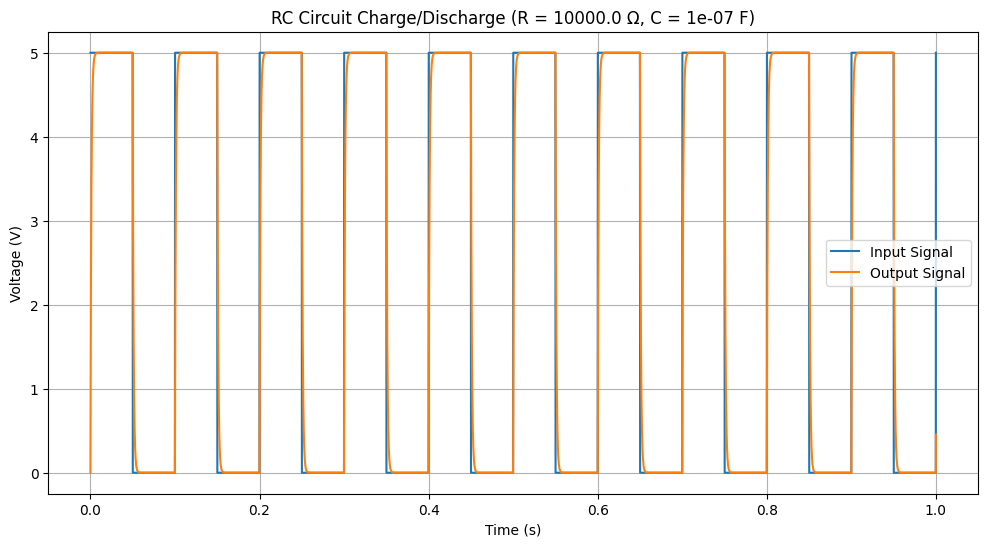

<IPython.core.display.Math object>

   Time (s)  Input Voltage (V)  Output Voltage (V)
0    0.0000                5.0            0.000000
1    0.0001                5.0            0.454587
2    0.0002                5.0            0.867844
3    0.0003                5.0            1.243528
4    0.0004                5.0            1.585057

Experiment 2: Impulse Response


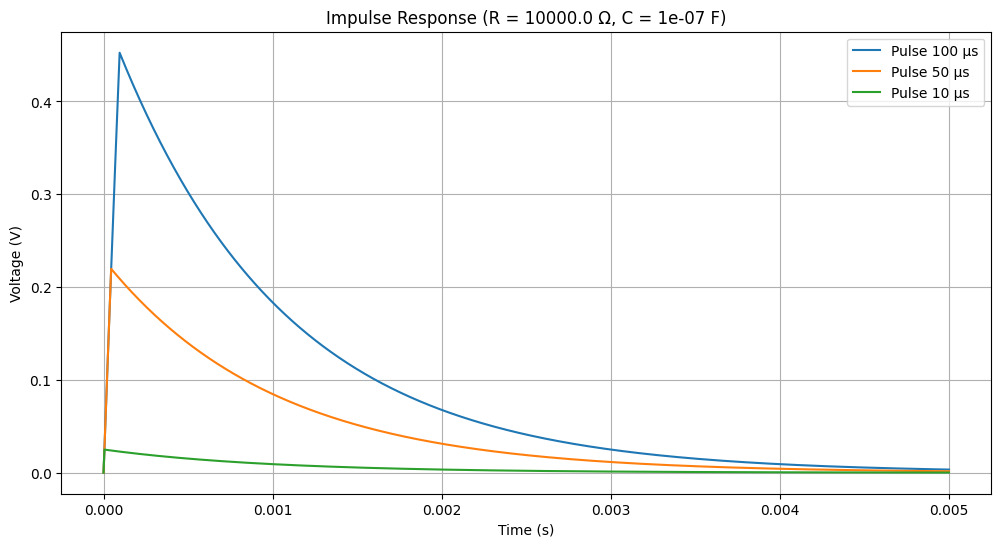

   Time (s)  Output (Pulse 100 µs)  Time (s)  Output (Pulse 50 µs)  Time (s)  \
0  0.000000               0.000000  0.000000              0.000000  0.000000   
1  0.000005               0.024900  0.000005              0.024900  0.000005   
2  0.000010               0.049677  0.000010              0.049677  0.000010   
3  0.000015               0.074330  0.000015              0.074330  0.000015   
4  0.000020               0.098860  0.000020              0.098860  0.000020   

   Output (Pulse 10 µs)  
0              0.000000  
1              0.024900  
2              0.024776  
3              0.024653  
4              0.024530  

Experiment 3: Bode Plot


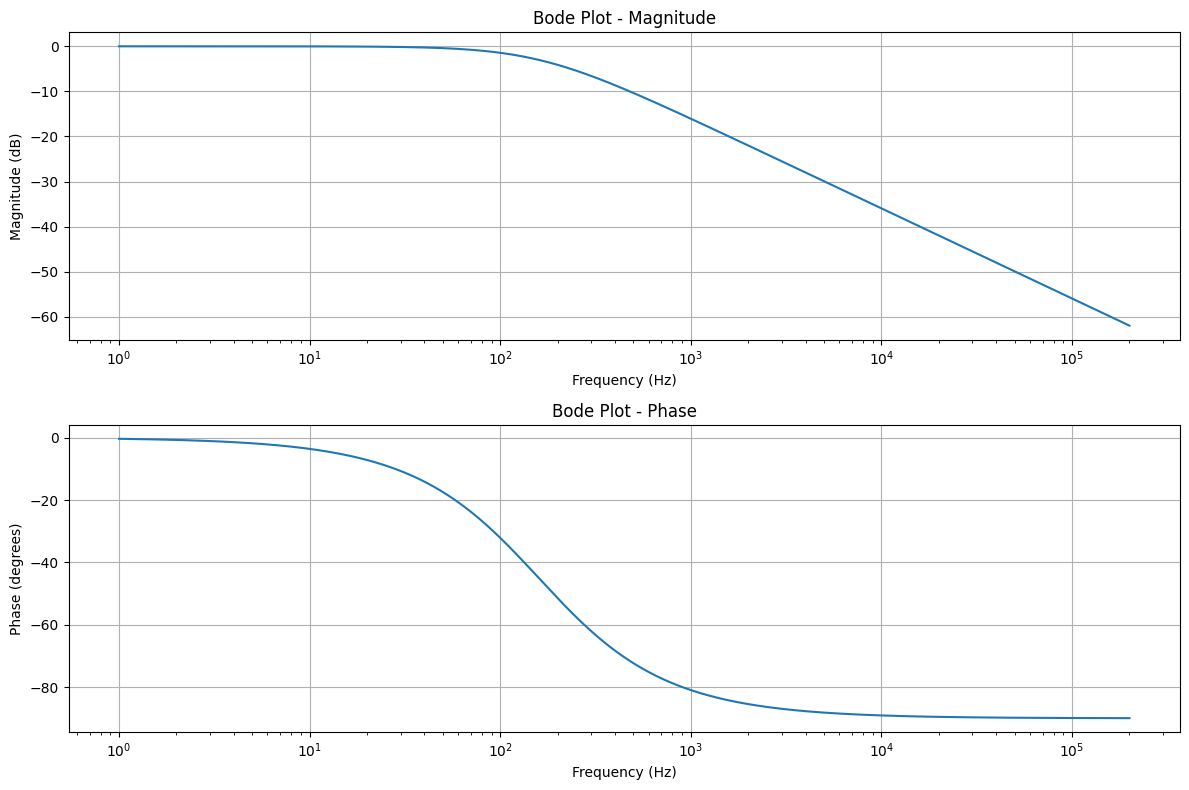

<IPython.core.display.Math object>

   Frequency (Hz)  Magnitude (dB)  Phase (degrees)
0        1.000000       -0.000171        -0.359995
1        1.012293       -0.000176        -0.364421
2        1.024738       -0.000180        -0.368900
3        1.037335       -0.000184        -0.373435
4        1.050087       -0.000189        -0.378026

Optional Experiment: RCRC Bode Plot


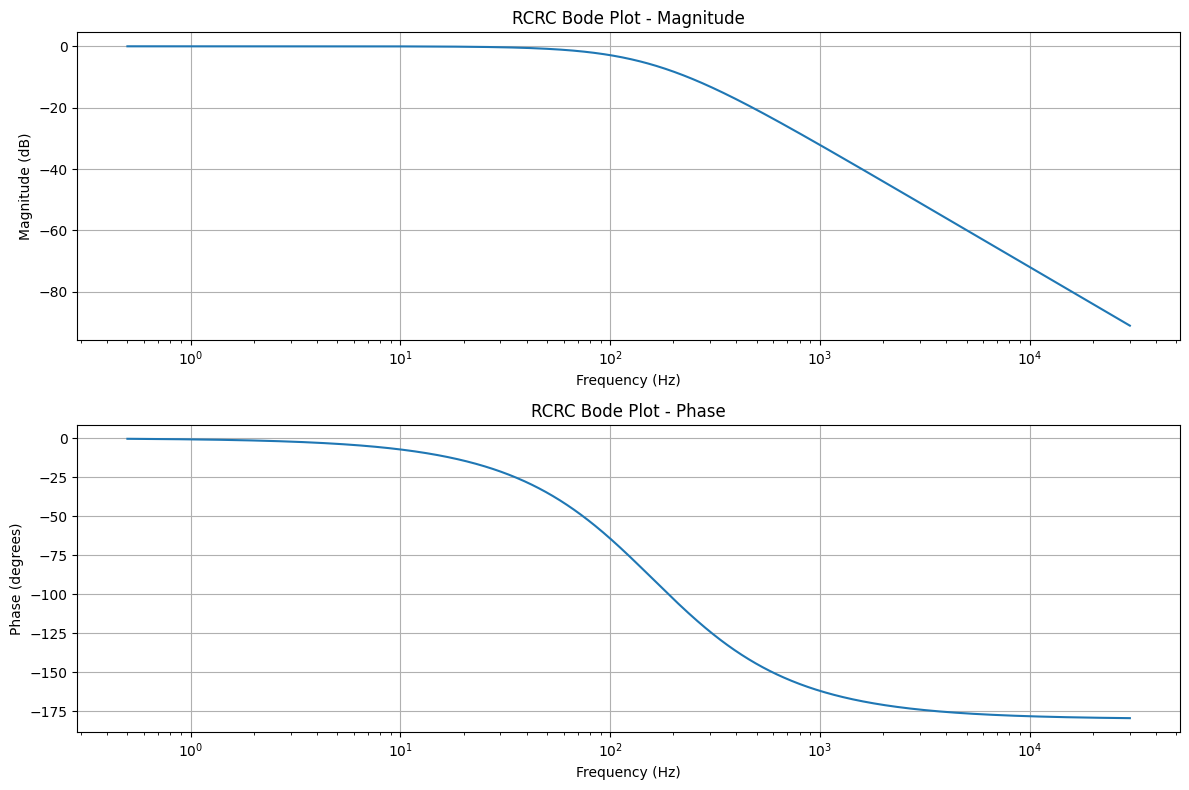

   Frequency (Hz)  Magnitude (dB)  Phase (degrees)
0        0.500000       -0.000086        -0.359999
1        0.505537       -0.000088        -0.363985
2        0.511135       -0.000090        -0.368016
3        0.516796       -0.000092        -0.372092
4        0.522519       -0.000094        -0.376212


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
from IPython.display import Math, display

class RCCircuitLab:
    def __init__(self, R, C):
        """Initialize RC circuit parameters"""
        self.R = R  # Ohms
        self.C = C  # Farads
        self.tau = R * C  # Time constant

    def experiment_1_charge_discharge(self, frequency=10, amplitude=5, offset=2.5):
        """
        Simulate RC circuit charging and discharging
        Experiment 1 in the laboratory document
        """
        t = np.linspace(0, 1, 10000)
        input_signal = signal.square(2 * np.pi * frequency * t, duty=0.5) * amplitude/2 + offset
        
        # RC circuit response calculation
        output_signal = np.zeros_like(t)
        dt = t[1] - t[0]
        
        for i in range(1, len(t)):
            dV = (input_signal[i] - output_signal[i-1]) * (dt / (self.tau + dt))
            output_signal[i] = output_signal[i-1] + dV
        
        # Create DataFrame
        df = pd.DataFrame({
            'Time (s)': t, 
            'Input Voltage (V)': input_signal, 
            'Output Voltage (V)': output_signal
        })
        
        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(t, input_signal, label='Input Signal')
        plt.plot(t, output_signal, label='Output Signal')
        plt.title(f'RC Circuit Charge/Discharge (R = {self.R} Ω, C = {self.C} F)')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Time constant calculation display
        display(Math(r'\tau = R \cdot C = %.2e \, \mathrm{s}' % self.tau))
        
        return df

    def experiment_2_impulse_response(self, pulse_durations=[100e-6, 50e-6, 10e-6]):
        """
        Simulate RC circuit impulse response
        Experiment 2 in the laboratory document
        """
        results_list = []
        
        plt.figure(figsize=(12, 6))
        for duration in pulse_durations:
            t = np.linspace(0, 5*self.tau, 1000)
            
            # Create impulse input
            input_signal = np.zeros_like(t)
            input_signal[t <= duration] = 5  # 5V during pulse duration
            
            # RC circuit response
            output_signal = np.zeros_like(t)
            output_signal[0] = 0
            dt = t[1] - t[0]
            
            for i in range(1, len(t)):
                dV = (input_signal[i] - output_signal[i-1]) * (dt / (self.tau + dt))
                output_signal[i] = output_signal[i-1] + dV
            
            plt.plot(t, output_signal, label=f'Pulse {duration*1e6:.0f} µs')
            
            results_list.append(pd.DataFrame({
                'Time (s)': t, 
                f'Output (Pulse {duration*1e6:.0f} µs)': output_signal
            }))
        
        plt.title(f'Impulse Response (R = {self.R} Ω, C = {self.C} F)')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        return pd.concat(results_list, axis=1)

    def experiment_3_bode_plot(self, min_freq=1, max_freq=200000):
        """
        Generate Bode plot for RC circuit
        Experiment 3 in the laboratory document
        """
        frequencies = np.logspace(np.log10(min_freq), np.log10(max_freq), 1000)
        omega = 2 * np.pi * frequencies
        
        # Transfer function
        H = 1 / (1 + 1j * omega * self.R * self.C)
        
        # Magnitude and phase calculation
        magnitude_db = 20 * np.log10(np.abs(H))
        phase_deg = np.angle(H, deg=True)
        
        df = pd.DataFrame({
            'Frequency (Hz)': frequencies, 
            'Magnitude (dB)': magnitude_db, 
            'Phase (degrees)': phase_deg
        })
        
        # Plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        ax1.semilogx(frequencies, magnitude_db)
        ax1.set_title('Bode Plot - Magnitude')
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('Magnitude (dB)')
        ax1.grid(True)
        
        ax2.semilogx(frequencies, phase_deg)
        ax2.set_title('Bode Plot - Phase')
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('Phase (degrees)')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Cutoff frequency calculation
        fc = 1 / (2 * np.pi * self.R * self.C)
        display(Math(r'\text{Cutoff Frequency}: f_c = \frac{1}{2\pi RC} = %.2e \, \mathrm{Hz}' % fc))
        
        return df

    def optional_rcrc_bode_plot(self, R2=10e3, C2=100e-9, min_freq=0.5, max_freq=30000):
        """
        Optional experiment: RCRC circuit Bode plot
        """
        frequencies = np.logspace(np.log10(min_freq), np.log10(max_freq), 1000)
        omega = 2 * np.pi * frequencies
        
        # Transfer function for cascaded RC stages
        H = 1 / ((1 + 1j * omega * self.R * self.C) * (1 + 1j * omega * R2 * C2))
        
        # Magnitude and phase calculation
        magnitude_db = 20 * np.log10(np.abs(H))
        phase_deg = np.angle(H, deg=True)
        
        # Plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        ax1.semilogx(frequencies, magnitude_db)
        ax1.set_title('RCRC Bode Plot - Magnitude')
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('Magnitude (dB)')
        ax1.grid(True)
        
        ax2.semilogx(frequencies, phase_deg)
        ax2.set_title('RCRC Bode Plot - Phase')
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('Phase (degrees)')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        return pd.DataFrame({
            'Frequency (Hz)': frequencies, 
            'Magnitude (dB)': magnitude_db, 
            'Phase (degrees)': phase_deg
        })

def main():
    # Parameters from the lab document
    R1 = 10e3   # 10 kΩ
    C1 = 100e-9 # 100 nF
    
    # Create RC circuit lab object
    rc_lab = RCCircuitLab(R1, C1)
    
    print("Experiment 1: RC Charge/Discharge")
    charge_discharge_df = rc_lab.experiment_1_charge_discharge()
    print(charge_discharge_df.head())
    
    print("\nExperiment 2: Impulse Response")
    impulse_response_df = rc_lab.experiment_2_impulse_response()
    print(impulse_response_df.head())
    
    print("\nExperiment 3: Bode Plot")
    bode_df = rc_lab.experiment_3_bode_plot()
    print(bode_df.head())
    
    print("\nOptional Experiment: RCRC Bode Plot")
    rcrc_df = rc_lab.optional_rcrc_bode_plot()
    print(rcrc_df.head())

if __name__ == "__main__":
    main()